/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


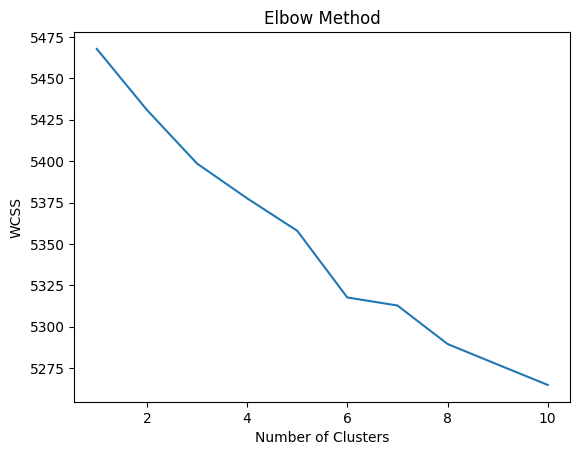

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('mail_data.csv')

# Convert text to numeric features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Message'])

# Initialize KMeans clustering algorithm
wcss = []
for i in range(1, 11):  # Try different numbers of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)  # Inertia is the within-cluster sum of squares

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectKBest, chi2

# Read the CSV file
df = pd.read_csv('lemmatized_without_stopwords_puntuation_libraries.csv')

# Preprocessing
# Implement your preprocessing steps here

# Convert text to numeric features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.05, ngram_range=(1, 2))  # Adjust parameters as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Message'])

# Scale the TF-IDF features using MaxAbsScaler
scaler = MaxAbsScaler()
tfidf_matrix_scaled = scaler.fit_transform(tfidf_matrix)

# Feature Selection
selector = SelectKBest(chi2, k='all')  # Select all features based on chi-square test
tfidf_matrix_selected = selector.fit_transform(tfidf_matrix, df['Category']) # Assuming 'Category' is your label column

# Initialize KMeans clustering algorithm
num_clusters = 2 # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Perform clustering
kmeans.fit(tfidf_matrix_selected)

# Get cluster labels
cluster_labels = kmeans.labels_

# Assign cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Optionally, you can save the cluster assignments to a new CSV file
df.to_csv('clustered_mail_data.csv', index=False)

# Calculate silhouette score
silhouette_avg = silhouette_score(tfidf_matrix_selected, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Access the inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Convert tfidf_matrix_selected to dense numpy array
dense_matrix = tfidf_matrix_selected.toarray()

# Calculate Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(dense_matrix, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

# Calculate Calinski-Harabasz Index (Variance Ratio Criterion)
calinski_harabasz_index = calinski_harabasz_score(dense_matrix, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6616654088590411
Inertia: 1157.6273947400623
Davies-Bouldin Index: 0.5220321877930633
Calinski-Harabasz Index: 2134.8768545384455
